In [68]:
import pandas as pd
df = pd.read_csv("LasVegas_ProcessedDataSet.csv")
LV_restaurants_Cat = df

In [69]:
import pandas as pd
df = pd.read_json('business.json', lines=True)
df.categories = df.categories.fillna('No category')
df = df.loc[df['categories'].str.contains('Restaurants')]
df = df[df['state'].str.contains('NV')]
df = df[df['city'].str.contains('Las Vegas')]

Business_Table_2 = df[['business_id', 'attributes']]
Business_Table_2['attributes'].apply(pd.Series)
Business_Table_2 = pd.concat([Business_Table_2.drop(['attributes'], axis=1), Business_Table_2['attributes'].apply(pd.Series)], axis=1)

In [70]:
LV_Business_Table = Business_Table_2.drop(['HappyHour', 'GoodForDancing','Smoking', 'GoodForMeal', 'Music', 'BikeParking', 'RestaurantsAttire', 'BusinessAcceptsBitcoin', 'ByAppointmentOnly', 'AcceptsInsurance', 'BusinessParking', 'Ambience', 'Caters', 'NoiseLevel', 'RestaurantsTableService', 'RestaurantsTakeOut','DriveThru', 'AgesAllowed', 'Corkage', 'CoatCheck', 'WheelchairAccessible', 'BestNights', 'BYOB', 'DietaryRestrictions', 'Open24Hours','DogsAllowed', 'BYOBCorkage','RestaurantsCounterService'], axis=1)


In [71]:
LV_merged_attribs_Cats =  LV_Business_Table.merge(LV_restaurants_Cat, on='business_id')

In [72]:
LV_merged_attribs_Cats = LV_merged_attribs_Cats.drop(['name', 'address', 'city', 'state', 'postal_code'], axis=1)
#LV_merged_attribs_Cats.isnull().sum()

In [73]:
#Change all null to False except price
#df2.dropna(subset=['three', 'four', 'five'], how='all')
LV_merged_attribs_Cats = LV_merged_attribs_Cats.dropna()
LV_merged_attribs_Cats

,business_id,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,categories,stars,review_count,is_open,TypeCusine
0,PZ-LZzSlhSe9utkQYU8pFg,False,True,False,True,False,2,True,u'no',True,u'full_bar',"Restaurants, Italian",4.0,40,0,Italian
1,tstimHoMcYbkSC4eBA1wEg,False,True,False,False,True,1,True,u'no',True,u'beer_and_wine',"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5,184,1,Mexican
2,kANF0dbeoW34s2vwh6Umfw,False,True,False,False,False,1,True,'no',True,u'none',"Fast Food, Food, Restaurants, Ice Cream & Froz...",2.0,33,0,American
4,bJP4l_BGq2CudEu0m-wNjg,False,True,False,True,True,4,True,u'no',False,u'full_bar',"Restaurants, Pizza, Italian, American (New)",2.0,3,0,Italian
6,6fPQJq4f_yiq1NHn0fd11Q,False,True,False,False,False,2,True,'no',True,'none',"French, Restaurants, Creperies",3.5,535,1,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,YVd2yYNjpiFg2s4ToMRmPA,True,True,False,False,True,1,True,'free',True,'none',"Food, Bakeries, Desserts, Breakfast & Brunch, ...",4.5,464,1,American
6716,qRymrsLmlA34bC8PvNoujg,True,True,False,True,True,2,True,'no',True,'beer_and_wine',"Mediterranean, Caterers, Event Planning & Serv...",4.0,572,1,Greek
6717,P8uECqGqXWTwEndkh-6bQw,False,True,True,False,True,2,True,u'free',False,u'full_bar',"Sandwiches, Pizza, Chicken Wings, Italian, Res...",4.0,576,1,Italian
6718,p5rpYtxS5xPQjt3MXYVEwA,True,True,False,False,True,2,True,u'free',True,u'none',"Sandwiches, Cafes, Pizza, Vegetarian, Gluten-F...",4.0,704,1,American


In [74]:
#Change WiFi to True and False
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "'no'", value = "False")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "u'no'", value = "False")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "u'free'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "'free'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "'paid'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "u'paid'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "None", value = "False")

In [75]:
#Change Alcohol to True and False
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "u'full_bar'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "u'beer_and_wine'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "'full_bar'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "'beer_and_wine'", value = "True")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "u'none'", value = "False")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "'none'", value = "False")
LV_merged_attribs_Cats = LV_merged_attribs_Cats.replace(to_replace = "None", value = "False")

In [76]:
# Change RestaurantPriceRange2 False Values to 2
LV_merged_attribs_Cats.RestaurantsPriceRange2 = LV_merged_attribs_Cats.RestaurantsPriceRange2.replace(to_replace = "False", value = "2")

In [77]:
#Drop Values that does not have range prices
LV_merged_attribs_Cats = LV_merged_attribs_Cats.dropna()

In [78]:
#Convert stars column from float to int
LV_merged_attribs_Cats['stars'] = LV_merged_attribs_Cats['stars'] * 10
LV_merged_attribs_Cats['stars']= LV_merged_attribs_Cats['stars'].astype(int)

In [79]:
#Backup our DF
LV_LabelEncoder = LV_merged_attribs_Cats

In [80]:
# variance of the star column
LV_LabelEncoder.loc[:,"stars"].var()

55.205793587363594

In [81]:
#Highly Rated Column
LV_LabelEncoder.loc[(LV_LabelEncoder.stars <= 40) & (LV_LabelEncoder.review_count < 150), 'HighlyRated'] = 'False'
LV_LabelEncoder.loc[(LV_LabelEncoder.stars <= 40) & (LV_LabelEncoder.review_count > 150), 'HighlyRated'] = 'False'
LV_LabelEncoder.loc[(LV_LabelEncoder.stars >= 40) & (LV_LabelEncoder.review_count < 150), 'HighlyRated'] = 'False'
LV_LabelEncoder.loc[(LV_LabelEncoder.stars >= 40) & (LV_LabelEncoder.review_count > 150), 'HighlyRated'] = 'True' 
LV_LabelEncoder.loc[(LV_LabelEncoder.stars < 40) & (LV_LabelEncoder.review_count <= 150), 'HighlyRated'] = 'False'
LV_LabelEncoder.loc[(LV_LabelEncoder.stars < 40) & (LV_LabelEncoder.review_count >= 150), 'HighlyRated'] = 'False'
LV_LabelEncoder.loc[(LV_LabelEncoder.stars > 40) & (LV_LabelEncoder.review_count <= 150), 'HighlyRated'] = 'False'
LV_LabelEncoder.loc[(LV_LabelEncoder.stars > 40) & (LV_LabelEncoder.review_count >= 150), 'HighlyRated'] = 'True' 
LV_LabelEncoder.loc[(LV_LabelEncoder.stars == 40) & (LV_LabelEncoder.review_count == 150), 'HighlyRated'] = 'True'


In [82]:
#HighlyRated as Target
Target = LV_LabelEncoder['HighlyRated']

In [83]:
#Drop the Business_id column
LV_LabelEncoder = LV_LabelEncoder.drop(['business_id'], axis = 1)

In [84]:
from sklearn.preprocessing import LabelEncoder
le_OutdoorSeating = LabelEncoder()
le_BusinessAcceptsCreditCards = LabelEncoder()
le_RestaurantsDelivery = LabelEncoder()
le_RestaurantsReservations = LabelEncoder()
le_HasTV = LabelEncoder()
le_RestaurantsPriceRange2 = LabelEncoder()
le_RestaurantsGoodForGroups = LabelEncoder()
le_WiFi = LabelEncoder()
le_GoodForKids = LabelEncoder()
le_Alcohol = LabelEncoder()
le_stars = LabelEncoder()
le_review_count = LabelEncoder()
le_is_open = LabelEncoder()
le_TypeCusine = LabelEncoder()
le_HighlyRated = LabelEncoder()

In [85]:
#Create new columns on our dataset using he new le values
LV_LabelEncoder['OutdoorSeating_New'] = le_OutdoorSeating.fit_transform(LV_LabelEncoder['OutdoorSeating'])
LV_LabelEncoder['BusinessAcceptsCreditCards_New'] = le_BusinessAcceptsCreditCards.fit_transform(LV_LabelEncoder['BusinessAcceptsCreditCards'])
LV_LabelEncoder['RestaurantsDelivery_New'] = le_RestaurantsDelivery.fit_transform(LV_LabelEncoder['RestaurantsDelivery'])
LV_LabelEncoder['RestaurantsReservations_New'] = le_RestaurantsReservations.fit_transform(LV_LabelEncoder['RestaurantsReservations'])
LV_LabelEncoder['HasTV_New'] = le_HasTV.fit_transform(LV_LabelEncoder['HasTV'])
LV_LabelEncoder['RestaurantsGoodForGroups_New'] = le_RestaurantsGoodForGroups.fit_transform(LV_LabelEncoder['RestaurantsGoodForGroups'])
LV_LabelEncoder['WiFi_New'] = le_WiFi.fit_transform(LV_LabelEncoder['WiFi'])
LV_LabelEncoder['GoodForKids_New'] = le_GoodForKids.fit_transform(LV_LabelEncoder['GoodForKids'])
LV_LabelEncoder['Alcohol_New'] = le_Alcohol.fit_transform(LV_LabelEncoder['Alcohol'])
#LV_LabelEncoder['TypeCusine_New'] = le_TypeCusine.fit_transform(LV_LabelEncoder['TypeCusine'])
LV_LabelEncoder['HighlyRated_New'] = le_HighlyRated.fit_transform(LV_LabelEncoder['HighlyRated'])
LV_LabelEncoder.head()


,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,...,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,WiFi_New,GoodForKids_New,Alcohol_New,HighlyRated_New
0,False,True,False,True,False,2,True,False,True,True,...,0,1,0,1,0,1,0,1,1,0
1,False,True,False,False,True,1,True,False,True,True,...,0,1,0,0,1,1,0,1,1,1
2,False,True,False,False,False,1,True,False,True,False,...,0,1,0,0,0,1,0,1,0,0
4,False,True,False,True,True,4,True,False,False,True,...,0,1,0,1,1,1,0,0,1,0
6,False,True,False,False,False,2,True,False,True,False,...,0,1,0,0,0,1,0,1,0,0


In [86]:
#Create dummy variables for TypeCusine
cuisine_dummies = pd.get_dummies(LV_LabelEncoder.TypeCusine, prefix='Cuisine')
LV_LabelEncoder = pd.concat([LV_LabelEncoder, cuisine_dummies], axis=1)

In [87]:
#Drop the original columns in favor of the numerical columns
LV_LabelEncoder = LV_LabelEncoder.drop(['OutdoorSeating', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups', 'WiFi', 'GoodForKids', 'Alcohol', 'TypeCusine', 'HighlyRated'], axis=1)

In [88]:
#Make a copy before dropping HighlyRated_New, stars and review_count
LV_Complete = LV_LabelEncoder
LV_LabelEncoder = LV_LabelEncoder.drop(['HighlyRated_New'], axis=1)
LV_LabelEncoder = LV_LabelEncoder.drop(['stars'], axis=1)
LV_LabelEncoder = LV_LabelEncoder.drop(['review_count'], axis=1)
LV_LabelEncoder = LV_LabelEncoder.drop(['categories'], axis=1)

In [89]:
LV_LabelEncoder.head()

,RestaurantsPriceRange2,is_open,OutdoorSeating_New,BusinessAcceptsCreditCards_New,RestaurantsDelivery_New,RestaurantsReservations_New,HasTV_New,RestaurantsGoodForGroups_New,WiFi_New,GoodForKids_New,...,Cuisine_Greek,Cuisine_Hawaiian,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Korean,Cuisine_LatinAmerican,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Vietnamese
0,2,0,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
LV_LabelEncoder.head()
X = LV_LabelEncoder
y = Target

In [91]:
#Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [92]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pred = knn.predict(X)

In [93]:
#Set to K = 3
from sklearn import metrics
metrics.accuracy_score(y, knn.predict(X))

0.8289305496378355

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
metrics.accuracy_score(y, knn.predict(X))

0.8348956114188325

In [95]:
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X, y)
#knn15.predict_proba(X)
metrics.accuracy_score(y, knn15.predict(X))

0.8095440988495952

In [96]:
#Using the Train/Test Split Procedure
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [97]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((3520, 30), (3520,), (1174, 30), (1174,))

In [98]:
#Train the model on the training set
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
#And evaluate it on the test set
metrics.accuracy_score(y_test, knn3.predict(X_test))

0.778534923339012

In [100]:
#  Now maybe 1 neighbor won't work as well?
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.7367972742759795

In [101]:
#Comparing Testing Accuracy With Null Accuracy (The Low Bar) -- Should we work on this???

In [102]:
#Cross-Validation N=5
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([0.76433121, 0.76808511, 0.77446809, 0.73773987, 0.76759062,
       0.77185501, 0.74626866, 0.7782516 , 0.7782516 , 0.76972281])

In [103]:
(scores.mean(), scores.std())

(0.7656564572256138, 0.012714147408263975)

In [104]:
# From this we can get a 95% confidence interval on test accuracy
(scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

(0.7402281624090858, 0.7910847520421418)

In [105]:
#Cross-Validation N=1
#Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate
#its performance, or to select the appropriate level of flexibility
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=10)
(scores.mean() - 2*scores.std(), scores.mean() + 2 * scores.std())

(0.6773782431542803, 0.7572317128928321)

********SHOULD WE USE THIS*********

There is a tradeoff in choosing number of cross-validation folds
Fewer folds, faster, less aggressive use of test data (cv=1 is just a train/test split)
More folds, slower. cv=n-1 is "all but one validation

In [106]:
knn = KNeighborsClassifier(n_neighbors=10)
for v in (2, 10, 20, 50, 100, 200):
    cv = cross_val_score(knn, X, y, cv=v)
    print (v, cv.mean(), cv.std())

2 0.7803584992251844 0.00139768150797831
10 0.7837719703035555 0.015016353098226718
20 0.7856897016714905 0.011949344387987539
50 0.7857096172139338 0.027808091310508203
100 0.7864377119950662 0.039471937977533414
200 0.786577536231884 0.05932463036556504


In [107]:
#Hyperparameter Optimization
scores = []
for k in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])

In [108]:
scores[0]

[1, 0.7173049780235562]

In [109]:
# This is a plot of test accuracy as a function of k

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score')

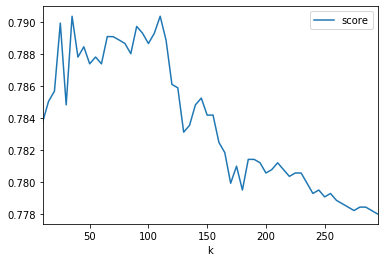

In [114]:
# Run between k range 10 and 100
scores = []
for k in range(10, 300, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

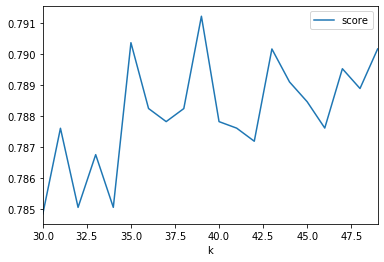

In [115]:
# K between 30 and 50
scores = []
for k in range(30, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, X, y, cv=10)
    scores.append([k, cv.mean()])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [124]:
#  Now maybe 64 neighbor
knn1 = KNeighborsClassifier(n_neighbors=42)
knn1.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn1.predict(X_test))

0.8006814310051107